# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Logistica: Lección 3 - Ajuste**

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:


- Realizar el ajuste o ajustes de los modelos
  
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.


### 1. Con los datos sin balancear

In [2]:
# abrimos el dataset
df = pd.read_pickle("datos/invistico_airline_encoding.pkl")
df.sample(5)

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
117432,1,0,1,1,1,0,3,2,1,1,1,1,1,1,4,5,3,5,1,-0.791667,0.828692,1.000000
66321,0,0,1,1,1,2,3,3,4,2,2,2,3,3,3,2,2,4,3,-0.625000,0.976371,0.000000
94410,1,1,1,1,1,0,3,1,1,3,1,1,2,3,3,5,1,5,1,0.708333,1.216878,0.333333
98521,1,1,1,1,1,1,3,3,4,3,1,3,2,3,3,5,3,5,2,0.125000,1.699578,0.000000
60373,0,1,0,1,2,1,3,3,4,3,3,4,4,2,2,5,3,4,4,-0.541667,-0.157806,0.000000


In [3]:
# comprobamos que no hay nulos
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
type_of_travel                       0
class                                0
seat_comfort                         0
departure_arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
age                                  0
flight_distance                      0
departure_delay_in_minutes           0
dtype: int64

In [4]:
# separamos los datos en X e y
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [5]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [6]:
# definimos la regresión logistica
log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test1)

In [7]:
# creamos un dataframe con los datos reales y predichos del test y el train
train_df = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train1)})
test_df  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
21413,1,1,Train
7284,0,0,Train
86080,0,0,Train
59842,0,0,Train
69486,0,0,Train


### 1.1 Matriz de confusión y métricas

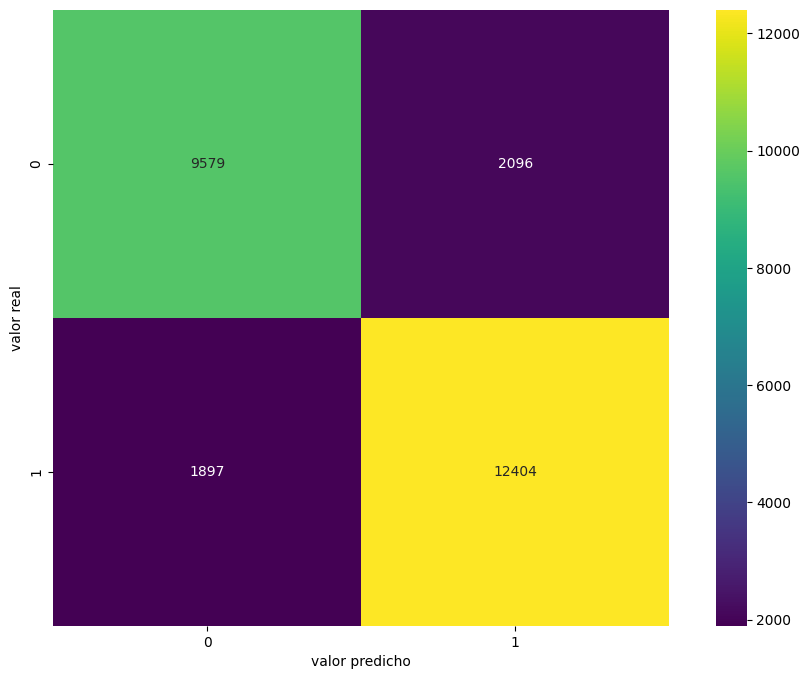

In [8]:
# obtenemos la matriz de confusión
mat_lr = confusion_matrix(y_test1, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Recordamos que 0 corresponde a los pasajeros insatisfechos y 1 a los satisfechos.  

CONCLUSIONES:
- Tenemos 9579 VN, que corresponden a los pasajeros insatisfechos que el modelo los ha predicho insatisfechos;
- Tenemos 2096 FP, que corresponden a los pasajeros insatisfechos que el modelo los ha predicho como satisfechos;
- Tenemos 1898 FN, que corresponden a los pasajeros satisfechos que el modelo los ha predicho como insatisfechos;
- Tenemos 12404 VP, que corresponden a los pasajeros satisfechos que el modelo los ha predicho satisfechos.



### 2. Con los datos balanceados

In [9]:
# abrimos el dataset
df_bal = pd.read_pickle("datos/invistico_airline_encod_balance.pkl")
df_bal.sample(5)

,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes,satisfaction
15168,1,1,0,2,3,3,4,4,2,4,2,3,2,4,2,1,3,3,-0.250000,-0.305485,0.00,0
99405,1,1,1,0,1,3,1,1,1,3,3,2,2,4,5,2,1,2,-0.416667,0.073418,0.00,1
26258,1,1,0,1,3,3,4,5,3,4,4,4,1,4,5,3,5,4,-0.916667,0.053165,0.00,0
31751,1,1,0,2,3,3,3,4,1,3,1,1,4,4,3,3,1,1,-0.791667,0.162025,4.25,0
42074,1,0,1,2,2,1,2,4,1,2,1,1,2,4,5,3,4,1,-0.833333,0.371308,5.75,0


In [10]:
# comprobamos que no hay nulos
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
type_of_travel                       0
class                                0
seat_comfort                         0
departure_arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
age                                  0
flight_distance                      0
departure_delay_in_minutes           0
dtype: int64

In [11]:
# separamos los datos en X e y
X2 = df_bal.drop("satisfaction", axis = 1)
y2 = df_bal["satisfaction"]

In [12]:
# separamos en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 5)

In [13]:
# definimos la regresión logistica
log_reg_bal = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_bal.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_bal = log_reg_bal.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test_bal = log_reg_bal.predict(x_test2)

In [14]:
# creamos un dataframe con los datos reales y predichos del test y el train
train_df_bal = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train_bal, 'Set': ['Train']*len(y_train2)})
test_df_bal  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test_bal,  'Set': ['Test']*len(y_test2)})
resultados = pd.concat([train_df_bal,test_df_bal], axis = 0)
resultados.head()

,Real,Predicted,Set
49013,0,0,Train
98414,1,1,Train
129189,0,0,Train
32570,0,0,Train
60937,1,1,Train


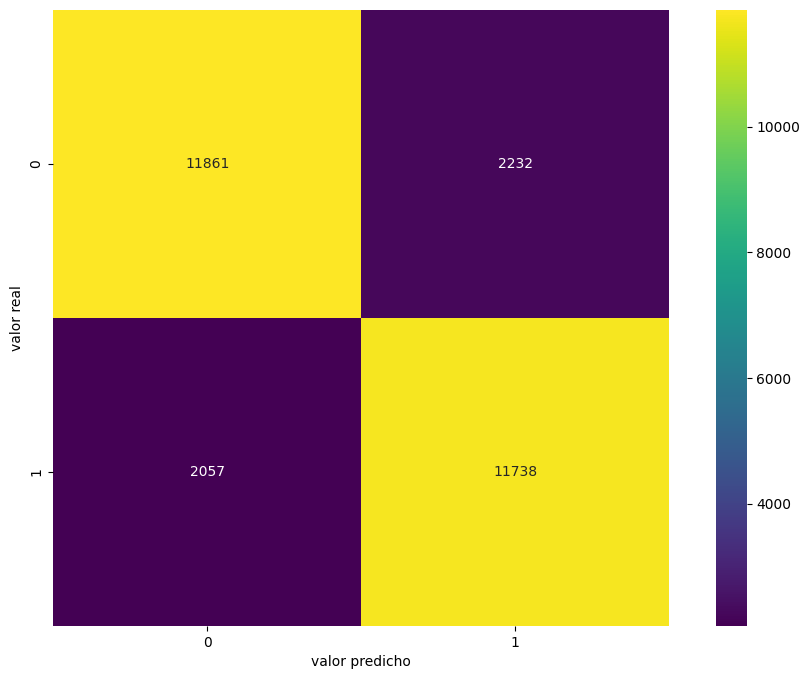

In [15]:
# obtenemos la matriz de confusión
mat_lr_bal = confusion_matrix(y_test2, y_pred_test_bal)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_bal, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Recordamos que 0 corresponde a los pasajeros insatisfechos y 1 a los satisfechos.  

CONCLUSIONES:
- Tenemos 11861 VN, que corresponden a los pasajeros insatisfechos que el modelo los ha predicho insatisfechos;
- Tenemos 2232 FP, que corresponden a los pasajeros insatisfechos que el modelo los ha predicho satisfechos;
- Tenemos 2057 FN, que corresponden a los pasajeros satisfechos que el modelo los ha predicho insatisfechos;
- Tenemos 11738 VP, que corresponden a los pasajeros satisfechos que el modelo los ha predicho satisfechos.